# Time Series Analysis and forecasting using Holt's Winter

# Objective(Business Scenario):
Forecast time series data using Holt's Winter

# Librarys
Importing Librarys

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Data Preparation

In [30]:
data = [446.6565,  454.4733,  455.663 ,  423.6322,  456.2713,  440.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  514.2689,  494.211 ]
index= pd.date_range(start='1996', end='2008', freq='A')
oildata = pd.Series(data, index)

data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
index= pd.date_range(start='1990', end='2005', freq='A')
air = pd.Series(data, index)

data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
index= pd.date_range(start='1970', end='2001', freq='A')
livestock2 = pd.Series(data, index)

data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
index= pd.date_range(start='2001', end='2008', freq='A')
livestock3 = pd.Series(data, index)

data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
index= pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')
aust = pd.Series(data, index)

# Simple Exponential Smoothing

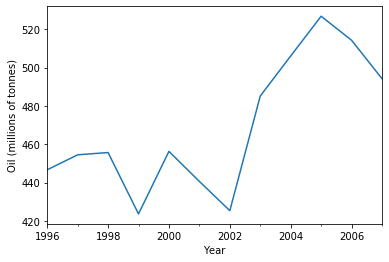

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


In [31]:
ax=oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
plt.show()
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

Here we run three variants of simple exponential smoothing: 
1. In fit1 we do not use the auto optimization but instead choose to explicitly provide the model with the α=0.2 parameter

2. In fit2 as above we choose an α=0.6

3. In fit3 we allow statsmodels to automatically find an optimized α value for us. This is the recommended approach.

C:\Users\P\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


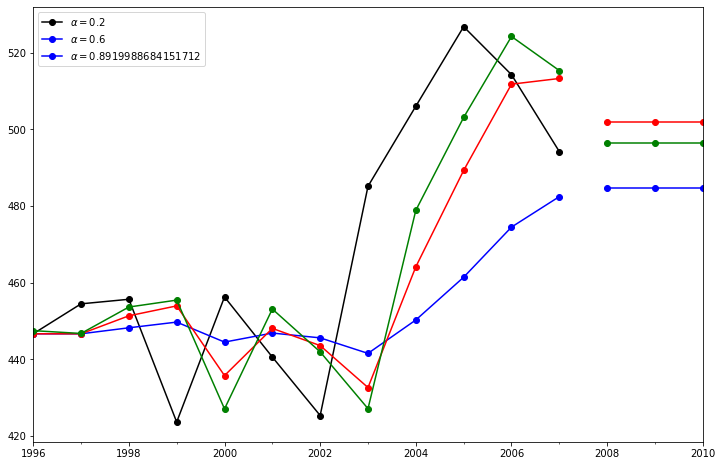

In [32]:
fit1 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(oildata).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = oildata.plot(marker='o', color='black', figsize=(12,8))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast2.plot(marker='o', ax=ax, color='red', legend=True)

fit2.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')
plt.show()

# Holt’s Method

This time we use air pollution data and the Holt’s Method. We will fit three examples again. 
1. In fit1 we again choose not to use the optimizer and provide explicit values for α=0.8 and β=0.2 
2. In fit2 we do the same as in fit1 but choose to use an exponential model rather than a Holt’s additive model.
3. In fit3 we used a damped versions of the Holt’s additive model but allow the dampening parameter ϕ to be optimized while fixing the values for α=0.8 and β=0.2

C:\Users\P\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


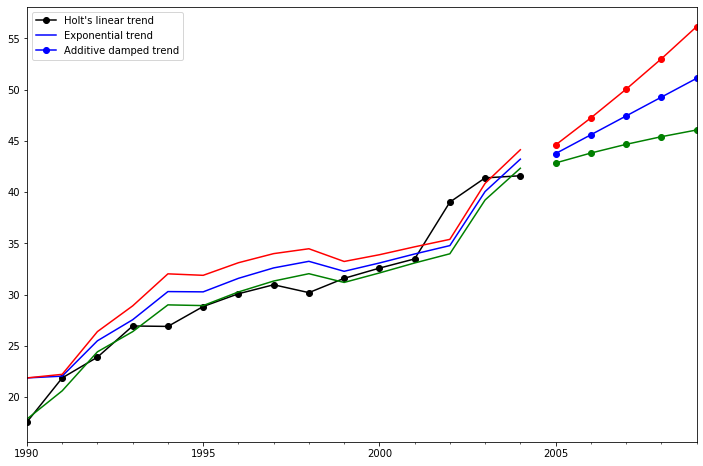

In [33]:
fit1 = Holt(air).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(air, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(air, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

ax = air.plot(color="black", marker="o", figsize=(12,8))
fit1.fittedvalues.plot(ax=ax, color='blue')
fcast1.plot(ax=ax, color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(ax=ax, color='red')
fcast2.plot(ax=ax, color='red', marker="o", legend=True)
fit3.fittedvalues.plot(ax=ax, color='green')
fcast3.plot(ax=ax, color='green', marker="o", legend=True)

plt.show()

# Seasonally adjusted data

Lets look at some seasonally adjusted livestock data. We fit five Holt’s models. The below table allows us to compare results when we use exponential versus additive and damped versus non-damped.

Note: fit4 does not allow the parameter ϕ to be optimized by providing a fixed value of ϕ=0.98

In [34]:
fit1 = SimpleExpSmoothing(livestock2).fit()
fit2 = Holt(livestock2).fit()
fit3 = Holt(livestock2,exponential=True).fit()
fit4 = Holt(livestock2,damped=True).fit(damping_slope=0.98)
fit5 = Holt(livestock2,exponential=True,damped=True).fit()
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'initial_level', 'initial_slope']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

C:\Users\P\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.000000,0.974306,0.977634,0.978826,0.974909
$\beta$,NaN,0.000000,0.000000,0.000000,0.000000
$\phi$,NaN,NaN,NaN,0.980000,0.981647
$l_0$,263.918414,258.882635,260.341624,257.355245,258.951921
$b_0$,NaN,5.010775,1.013780,6.644290,1.038144
SSE,6761.350218,6004.138200,6104.194747,6036.555016,6081.995045


# Plots of Seasonally Adjusted Data

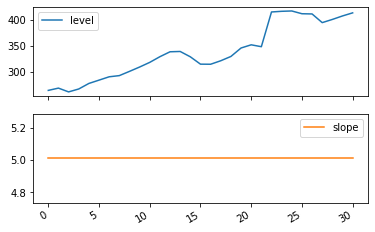

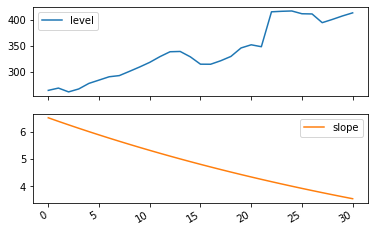

Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.


In [35]:
for fit in [fit2,fit4]:
    pd.DataFrame(np.c_[fit.level,fit.slope]).rename(
        columns={0:'level',1:'slope'}).plot(subplots=True)
plt.show()
print('Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.')

# Comparison

Here we plot a comparison Simple Exponential Smoothing and Holt’s Methods for various additive, exponential and damped combinations. All of the models parameters will be optimized by statsmodels.

C:\Users\P\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


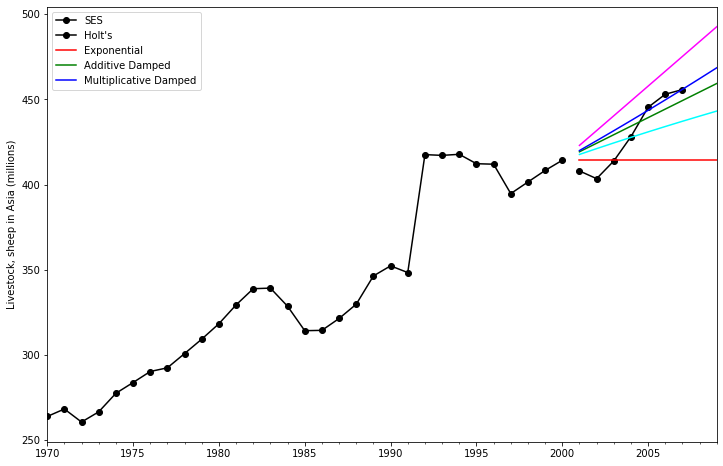

Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.


In [36]:
fit1 = SimpleExpSmoothing(livestock2).fit()
fcast1 = fit1.forecast(9).rename("SES")
fit2 = Holt(livestock2).fit()
fcast2 = fit2.forecast(9).rename("Holt's")
fit3 = Holt(livestock2, exponential=True).fit()
fcast3 = fit3.forecast(9).rename("Exponential")
fit4 = Holt(livestock2, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(9).rename("Additive Damped")
fit5 = Holt(livestock2, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

ax = livestock2.plot(color="black", marker="o", figsize=(12,8))
livestock3.plot(ax=ax, color="black", marker="o", legend=False)
fcast1.plot(ax=ax, color='red', legend=True)
fcast2.plot(ax=ax, color='green', legend=True)
fcast3.plot(ax=ax, color='blue', legend=True)
fcast4.plot(ax=ax, color='cyan', legend=True)
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('Livestock, sheep in Asia (millions)')
plt.show()
print('Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.')

# Holt’s Winters Seasonal

Finally we are able to run full Holt’s Winters Seasonal Exponential Smoothing including a trend component and a seasonal component. statsmodels allows for all the combinations including as shown in the examples below:
1. fit1 additive trend, additive seasonal of period season_length=4 and the use of a Box-Cox transformation. 
2. fit2 additive trend, multiplicative seasonal of period season_length=4 and the use of a Box-Cox transformation.. 
3. fit3 additive damped trend, additive seasonal of period season_length=4 and the use of a Box-Cox transformation. 
4. fit4 additive damped trend, multiplicative seasonal of period season_length=4 and the use of a Box-Cox transformation.

The plot shows the results and forecast for fit1 and fit2. 
The table allows us to compare the results and parameterizations.

C:\Users\P\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\P\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\P\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


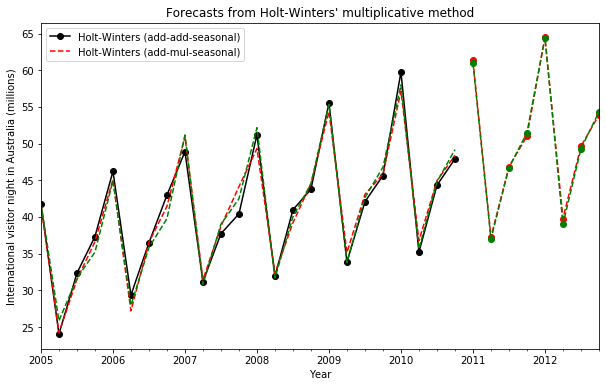

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,4.546647e-01,3.664383e-01,8.739510e-09,0.000188
$\beta$,1.558825e-08,4.118538e-24,8.207203e-70,0.000188
$\phi$,NaN,NaN,9.428597e-01,0.913530
$\gamma$,5.243636e-01,5.957200e-18,2.306364e-07,0.000000
$l_0$,1.421755e+01,1.454998e+01,1.415675e+01,14.534974
$b_0$,1.307571e-01,1.661634e-01,2.461681e-01,0.483888
SSE,5.001713e+01,4.307388e+01,3.528424e+01,39.678743


In [37]:
fit1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()
print("Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results

Finally lets look at the levels, slopes/trends and seasonal components of the models

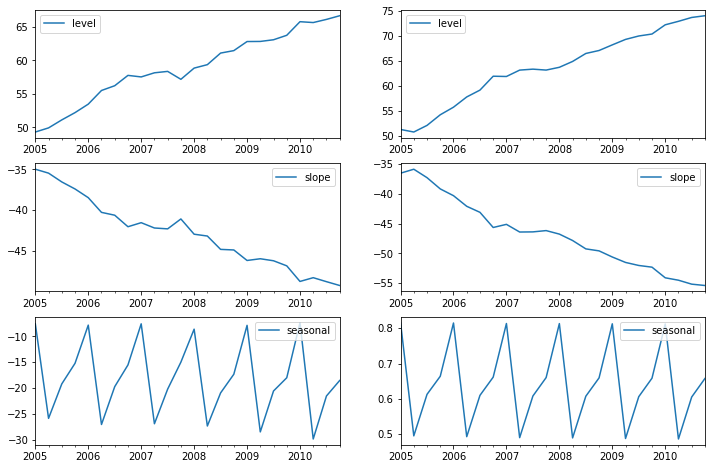

In [38]:
states1 = pd.DataFrame(np.c_[fit1.level, fit1.slope, fit1.season], columns=['level','slope','seasonal'], index=aust.index)
states2 = pd.DataFrame(np.c_[fit2.level, fit2.slope, fit2.season], columns=['level','slope','seasonal'], index=aust.index)
fig, [[ax1, ax4],[ax2, ax5], [ax3, ax6]] = plt.subplots(3, 2, figsize=(12,8))
states1[['level']].plot(ax=ax1)
states1[['slope']].plot(ax=ax2)
states1[['seasonal']].plot(ax=ax3)
states2[['level']].plot(ax=ax4)
states2[['slope']].plot(ax=ax5)
states2[['seasonal']].plot(ax=ax6)
plt.show()

# Nonlinear Trend Regression

NonlinearTrend Regression is a form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables.

# Librarys
Importing Librarys

In [1]:
import numpy.polynomial.polynomial as poly
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


# Data Preparation

In [5]:
df = pd.DataFrame([[i for i in range(2000,2018)],
[23.0,27.5,46.0,56.0,64.8,71.2,80.2,98.0,113.0,155.8,414.0,2297.8,3628.4,16187.8,25197.8,42987.8,77555.5,130631.9]])
df = df.T
df.columns = ['Year', 'Values']
df['Year'] = df['Year'].astype(int)
df['Values'] = df['Values'].astype(int)

# Forecasting for next 5 years

                 0
271916.90625  2019
377429.68750  2020
510010.28125  2021
673797.15625  2022


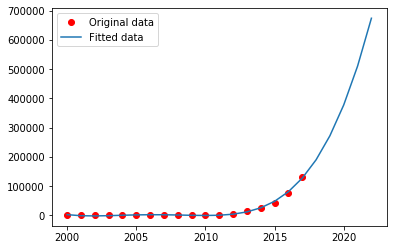

In [4]:
no_of_predictions = 5
X = np.array(df.Year, dtype = float)
y = np.array(df.Values, dtype = float)
Z = [2019,2020,2021,2022]
coefs = poly.polyfit(X, y, 4)
X_new = np.linspace(X[0], X[-1]+no_of_predictions, num=len(X)+no_of_predictions)
ffit = poly.polyval(X_new, coefs)
pred = poly.polyval(Z, coefs)
predictions = pd.DataFrame(Z,pred)
print (predictions)
plt.plot(X, y, 'ro', label="Original data")
plt.plot(X_new, ffit, label = "Fitted data")
plt.legend(loc='upper left')
plt.show()